In [2]:
import pandas as pd
import numpy as np
import holoviews as hv
hv.extension('matplotlib')

import matplotlib.pyplot as plt
pd.options.display.max_columns = 60

Output hidden; open in https://colab.research.google.com to view.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Подготовка данных

In [4]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1M5xO3nFqHIK75Hl_5vvWlBVZoo3vox-f

Downloading...
From: https://drive.google.com/uc?id=1M5xO3nFqHIK75Hl_5vvWlBVZoo3vox-f
To: /content/WA_Fn-UseC_-Telco-Customer-Churn.csv
100% 978k/978k [00:00<00:00, 5.96MB/s]


In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Преобразование категориальных данных

In [7]:
df = pd.get_dummies(df,prefix = ['gender','partner','dependents','phone_service','paperless_billing','churn'], dummy_na = False,
                    columns = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn'],drop_first=True).fillna(0)

In [8]:
le = LabelEncoder()
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

In [9]:
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes
0,7590-VHVEG,0,1,1,0,0,2,0,0,0,0,0,2,29.85,29.85,0,1,0,0,1,0
1,5575-GNVDE,0,34,0,0,2,0,2,0,0,0,1,3,56.95,1889.5,1,0,0,1,0,0
2,3668-QPYBK,0,2,0,0,2,2,0,0,0,0,0,3,53.85,108.15,1,0,0,1,1,1
3,7795-CFOCW,0,45,1,0,2,0,2,2,0,0,1,0,42.30,1840.75,1,0,0,0,0,0
4,9237-HQITU,0,2,0,1,0,0,0,0,0,0,0,2,70.70,151.65,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,2,0,2,0,2,2,2,2,1,3,84.80,1990.5,1,1,1,1,1,0
7039,2234-XADUH,0,72,2,1,0,2,2,0,2,2,1,1,103.20,7362.9,0,1,1,1,1,0
7040,4801-JZAZL,0,11,1,0,2,0,0,0,0,0,0,2,29.60,346.45,0,1,1,0,1,0
7041,8361-LTMKD,1,4,2,1,0,0,0,0,0,0,0,3,74.40,306.6,1,1,0,1,1,1


### Удаление записей с пустым полем TotalCharges

In [10]:
def outl(x):
    if type(x) == list and len(x)>0:
        return x[0]
    else:
        return np.nan

In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df = df.drop(df[df.TotalCharges != df.TotalCharges].index,axis=0).reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7032 non-null   int64  
 1   customerID             7032 non-null   object 
 2   SeniorCitizen          7032 non-null   int64  
 3   tenure                 7032 non-null   int64  
 4   MultipleLines          7032 non-null   int64  
 5   InternetService        7032 non-null   int64  
 6   OnlineSecurity         7032 non-null   int64  
 7   OnlineBackup           7032 non-null   int64  
 8   DeviceProtection       7032 non-null   int64  
 9   TechSupport            7032 non-null   int64  
 10  StreamingTV            7032 non-null   int64  
 11  StreamingMovies        7032 non-null   int64  
 12  Contract               7032 non-null   int64  
 13  PaymentMethod          7032 non-null   int64  
 14  MonthlyCharges         7032 non-null   float64
 15  Tota

## Разбиение выборки на обучающую и тестовую

In [12]:
test = df[4500:]
df = df[:4500]

# WoE количественных признаков

In [13]:
def bad_rate(df,feature,target,num_buck = 10):
    '''
    df - датафрейм
    feature - признак (название столбца в датафрейме)
    target - название целевой переменной
    num_buck - количество бакетов
    Функция считает bad_rate для каждого бакета
    Возвращает датафрейм с аггрегациями (сумма просрочек в бакете, среднее значение предсказания,
    количество заявок в бакете, среднее значение признака в бакете)
    '''
    return df.assign(bucket = np.ceil(df[feature].rank(pct = True) * num_buck),obj_count = 1)\
             .groupby('bucket')\
             .agg({target:'sum','obj_count':sum,feature:'mean'})\
             .rename(columns = {target:'bad',feature:'average'})\
             .assign(good = lambda x: x.obj_count - x.bad)\
             .assign(bad_rate = lambda x:x.bad/x.obj_count)

In [14]:
from math import log
def woe(df,feature,target,num_buck = 10):
    '''считаем woe
       df - датафрейм
       feature - признак
       predict - предсказание
       target - целевая переменная
       num_buck - количество бакетов
       Считаем woe, так как признаки могут принимать значения 0, добавляем малую константу 0.00001
    '''
    agg = bad_rate(df,feature,target,num_buck).reset_index()
    agg = agg[agg.bad != 0]
    return agg.assign(woe = lambda x:(x.bad_rate/(1-x.bad_rate) + 0.00001).apply(log) -
                      log((df[target].sum()/(len(df) - df[target].sum())))).set_index('bucket')

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
def woe_plot(df, feature, target, num_buck = 10):
    res = woe(df, feature, target, num_buck)    
    check = LinearRegression()
    check.fit(np.array(res.index).reshape(-1,1), np.array(res.woe))    
    plt.plot(np.array(res.index), check.coef_*np.array(np.array(res.index)) + check.intercept_)
    plt.scatter(np.array(res.index), np.array(res.woe))

In [17]:
woe(df,'TotalCharges','churn_Yes', num_buck=15)

,bad,obj_count,average,good,bad_rate,woe
bucket,,,,,,
1.0,123,299,35.784950,176,0.411371,0.675017
2.0,173,300,89.073500,127,0.576667,1.342414
3.0,105,301,193.016113,196,0.348837,0.409166
4.0,97,300,340.181833,203,0.323333,0.294828
5.0,78,300,543.571500,222,0.260000,-0.012638
6.0,82,300,801.637167,218,0.273333,0.055553
7.0,80,300,1089.506000,220,0.266667,0.021729
8.0,62,300,1391.563833,238,0.206667,-0.311796
9.0,53,300,1774.600667,247,0.176667,-0.505748


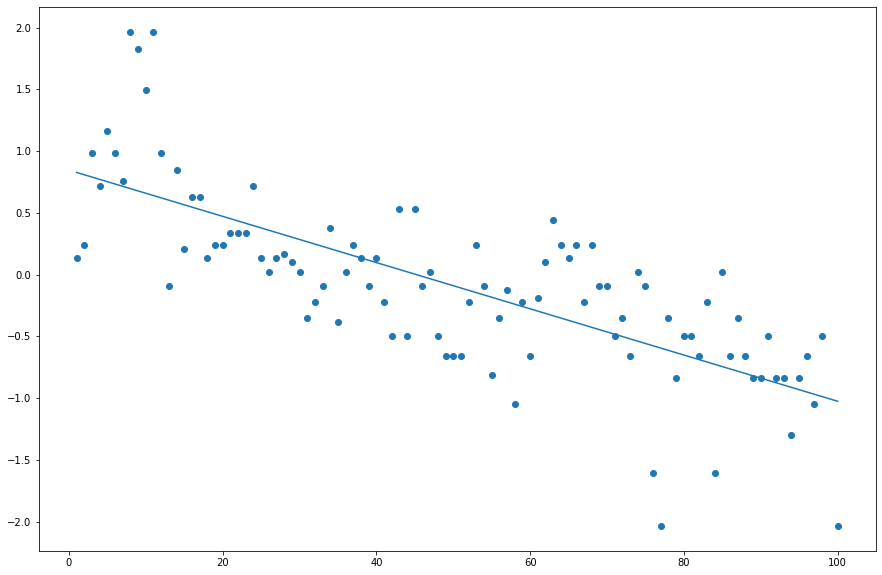

In [18]:
plt.figure(figsize=(15,10))
woe_plot(df,'TotalCharges','churn_Yes', num_buck=100)

In [19]:
woe(df,'tenure','churn_Yes', num_buck=15)

,bad,obj_count,average,good,bad_rate,woe
bucket,,,,,,
1.0,236,398,1.000000,162,0.592965,1.409544
2.0,85,157,2.000000,72,0.541401,1.199296
3.0,150,335,3.874627,185,0.447761,0.823594
4.0,109,306,7.575163,197,0.356209,0.441464
5.0,96,281,11.430605,185,0.341637,0.377314
6.0,108,327,16.397554,219,0.330275,0.326382
7.0,82,311,22.713826,229,0.263666,0.006327
8.0,55,274,28.500000,219,0.200730,-0.348397
9.0,69,315,35.203175,246,0.219048,-0.237887


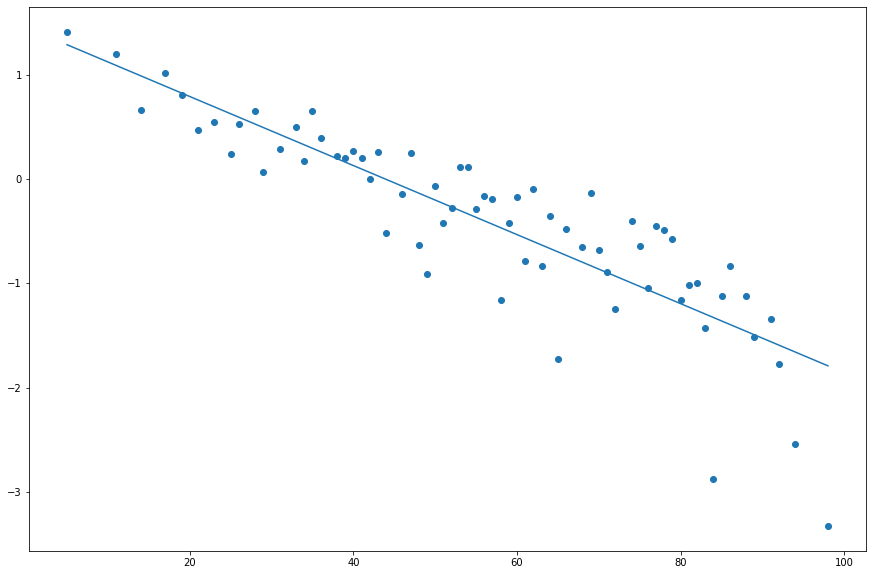

In [20]:
plt.figure(figsize=(15,10))
woe_plot(df,'tenure','churn_Yes', num_buck=100)

In [21]:
woe(df,'MonthlyCharges','churn_Yes', num_buck=15)

,bad,obj_count,average,good,bad_rate,woe
bucket,,,,,,
1.0,28,288,19.444965,260,0.097222,-1.195082
2.0,22,319,20.081661,297,0.068966,-1.569253
3.0,29,293,22.614846,264,0.098976,-1.175260
4.0,60,300,30.803000,240,0.200000,-0.352952
5.0,99,300,46.920000,201,0.330000,0.325137
6.0,59,301,54.632060,242,0.196013,-0.378057
7.0,33,297,63.386027,264,0.111111,-1.046060
8.0,110,302,70.918046,192,0.364238,0.476304
9.0,125,297,76.002020,172,0.420875,0.714135


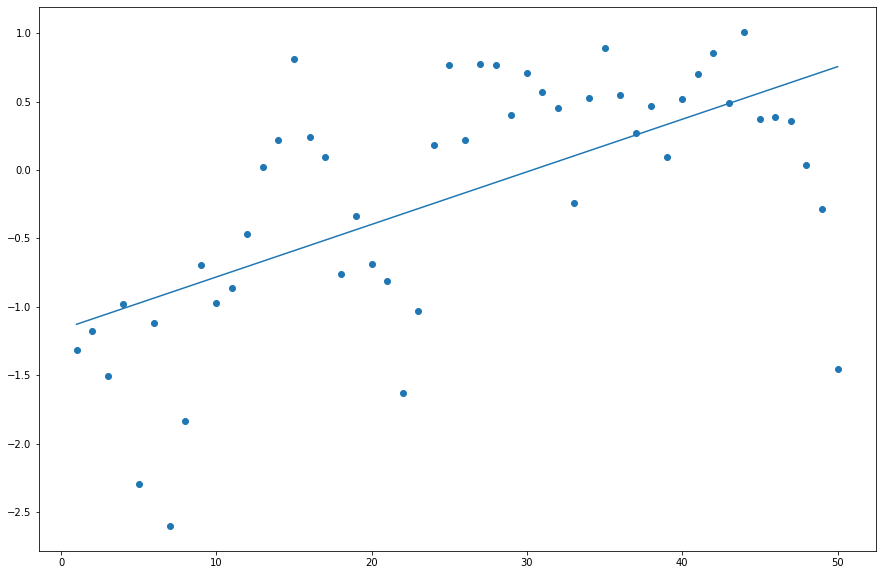

In [22]:
plt.figure(figsize=(15,10))
woe_plot(df,'MonthlyCharges','churn_Yes', num_buck=50)

Таким образом, можно увидеть, что проблемы с линейностью только у признака MonthlyCharges, а выпуклые преобразования на WoE не влияют, да и линейные участки на нём тяжело выделить, поэтому откидываем этот признак

# Information Value

In [23]:
def calc_iv(df, feature, target, num_buck = 10):
    temp = woe(df,feature,target,num_buck = num_buck)
    temp['good_distr'] = temp.good / temp.good.sum()
    temp['bad_distr'] = temp.bad / temp.bad.sum()
    temp['IV'] = (temp['bad_distr'] - temp['good_distr']) * temp.woe
    return temp.IV.sum()


In [24]:
def features_iv(df, target, iv_min, num_buck = 10):
    '''высчитываем iv для всех признаков и берём те, у которых значение iv больше iv_min'''    
    iv_list = {}
    for f in df.columns:
        if f != 'index' and f != 'customerID' and f != 'churn_Yes':
            check = df[f].value_counts().count()
            if check <=4:
                iv_list[f] = calc_iv(df, f, 'churn_Yes', num_buck=check)
            else:
                iv_list[f] = calc_iv(df, f, 'churn_Yes', num_buck=10)
    iv_sort = sorted(list(iv_list.items()), key=lambda x:x[1], reverse=True)
    mask = np.where(np.array(iv_sort).T[1].astype('float64') > iv_min, True, False)
    
    return np.array(iv_sort).T[0][mask]

Выделим все признаки, IV которых выше 0.2:

In [25]:
main_features = features_iv(df, 'churn_Yes', 0.2, num_buck=10)
main_features

array(['Contract', 'tenure', 'TechSupport', 'OnlineSecurity',
       'InternetService', 'OnlineBackup', 'DeviceProtection',
       'PaymentMethod', 'StreamingTV', 'StreamingMovies',
       'MonthlyCharges', 'TotalCharges', 'paperless_billing_Yes'],
      dtype='<U22')

# Проверка мультиколлинеарности количественных признаков

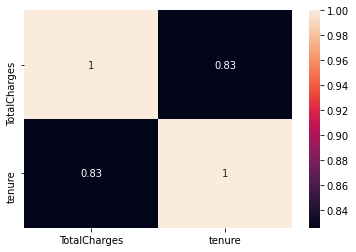

In [26]:
import seaborn as sns
df1 = df[['TotalCharges', 'tenure']].copy(deep=True)
sns.heatmap(df1.corr(), annot=True)

Таким образом, один из двух признаков мы откидываем, IV у параметра tenure выше, поэтому берём его

In [27]:
main_features = np.delete(main_features, np.where(main_features == 'TotalCharges'))
main_features = np.delete(main_features, np.where(main_features == 'MonthlyCharges'))
main_features

array(['Contract', 'tenure', 'TechSupport', 'OnlineSecurity',
       'InternetService', 'OnlineBackup', 'DeviceProtection',
       'PaymentMethod', 'StreamingTV', 'StreamingMovies',
       'paperless_billing_Yes'], dtype='<U22')

# Построение модели логистической регрессии

In [28]:
model = make_pipeline(StandardScaler(),LogisticRegression())
feature = [f for f in main_features]
model.fit(np.array(df[feature]),df['churn_Yes'])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [29]:
from sklearn.metrics import roc_auc_score, log_loss

pd.DataFrame(
    data = {'metrics':['roc_auc','log_loss'],'value':[roc_auc_score(
        df['churn_Yes'],model.predict_proba(np.array(df[feature]))[:,1]),
            log_loss(df['churn_Yes'],model.predict_proba(
                np.array(df[feature]))[:,1])]}).set_index('metrics')

,value
metrics,
roc_auc,0.829039
log_loss,0.432398


# Проверка модели на тестовой выборке

In [30]:
feature = [f for f in main_features]
model.predict(np.array(test[feature]))

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [31]:
pd.DataFrame(
    data = {'metrics':['roc_auc','log_loss'],'value':[roc_auc_score(
        test['churn_Yes'],model.predict_proba(np.array(test[feature]))[:,1]),
            log_loss(test['churn_Yes'],model.predict_proba(
                np.array(test[feature]))[:,1])]}).set_index('metrics')

,value
metrics,
roc_auc,0.814275
log_loss,0.459312
